In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2
from marcia import Cosmology
from marcia import Data
from marcia import Likelihood
from marcia import Sampler
#from marcia import Kernels

# Validate Cosmology

In [6]:
cParIni = [70.0, 0.3,] 
params = ['H0','Omega_m',]

theory = Cosmology('wCDM',['H0','Omega_m','w0'])

z_min = 0.001
z_max = 10.0
zlist = np.linspace(z_min, z_max, 10)

In [6]:
theory.transverse_distance( [70, 0.3, -1.2], zlist)

array([4.27307206e+00, 3.56727608e+03, 5.48514650e+03, 6.65657529e+03,
       7.45774195e+03, 8.04816315e+03, 8.50601569e+03, 8.87429913e+03,
       9.17878548e+03, 9.43595655e+03])

In [19]:
redshifts = np.linspace(0.0, 2.0, 100)  # Array of redshift values from 0 to 2 (inclusive) with 100 points                                                                                                    
Omega_m = 0.3
Omega_de = 0.7
Omega_k = 1.0 - Omega_m - Omega_de
H0 = 70

In [20]:
lcdm = Cosmology('LCDM',['H0','Omega_m'])

In [21]:
redshifts

array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
       0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
       0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
       0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
       0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
       0.50505051, 0.52525253, 0.54545455, 0.56565657, 0.58585859,
       0.60606061, 0.62626263, 0.64646465, 0.66666667, 0.68686869,
       0.70707071, 0.72727273, 0.74747475, 0.76767677, 0.78787879,
       0.80808081, 0.82828283, 0.84848485, 0.86868687, 0.88888889,
       0.90909091, 0.92929293, 0.94949495, 0.96969697, 0.98989899,
       1.01010101, 1.03030303, 1.05050505, 1.07070707, 1.09090909,
       1.11111111, 1.13131313, 1.15151515, 1.17171717, 1.19191919,
       1.21212121, 1.23232323, 1.25252525, 1.27272727, 1.29292929,
       1.31313131, 1.33333333, 1.35353535, 1.37373737, 1.39393939,
       1.41414141, 1.43434343, 1.45454545, 1.47474747, 1.49494

In [24]:
lcdm.distance_modulus([H0, Omega_m], redshifts, redshifts)

../marcia/cosmology.py:131: RuntimeWarning: divide by zero encountered in log10
  mu = Mb + 25. + 5.*np.log10( (1+ z2)* self.transverse_distance(parameters, z1) )


array([       -inf, 15.66902268, 17.20668824, 18.11872851, 18.77409599,
       19.28844228, 19.71330747, 20.07619064, 20.39352241, 20.67590791,
       20.9305916 , 21.16275558, 21.37622541, 21.57391369, 21.75808824,
       21.93055141, 22.09275921, 22.24590398, 22.3909775 , 22.52881344,
       22.66011923, 22.78549888, 22.9054745 , 23.02050052, 23.13097483,
       23.23724726, 23.33962771, 23.43839237, 23.53378849, 23.62603737,
       23.71533892, 23.80187435, 23.88580826, 23.96729056, 24.04645808,
       24.12343646, 24.19834125, 24.2712789 , 24.34234769, 24.41163874,
       24.47923657, 24.54521965, 24.60966097, 24.67262855, 24.73418587,
       24.79439284, 24.85330562, 24.91097673, 24.96745553, 25.02278848,
       25.07701844, 25.13018693, 25.18233405, 25.23349675, 25.28371003,
       25.33300705, 25.38141927, 25.42897666, 25.47570767, 25.52163932,
       25.56679737, 25.61120634, 25.65488963, 25.69786962, 25.74016766,
       25.78180413, 25.82279853, 25.86316952, 25.902935  , 25.94

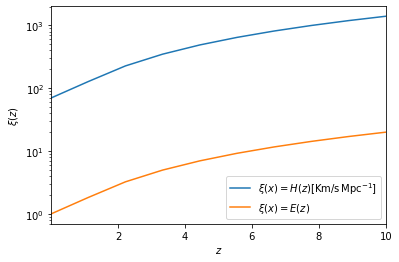

In [38]:
zlist = np.linspace(z_min, z_max, 10)

plt.xlim(z_min,z_max)
plt.yscale('log')
# plt.xscale('log')
plt.xlabel(r'$z$')
plt.ylabel(r'$\xi(z)$')

plt.plot(zlist, theory.hubble_rate(cParIni,zlist), label = r'$\xi(x) = H(z) [\rm{Km/s\, Mpc^{-1}}]$')
plt.plot(zlist, theory.hubble_rate(cParIni, zlist)/theory.param(cParIni).H0, label=r'$\xi(x) = E(z)$')

plt.gca().legend()

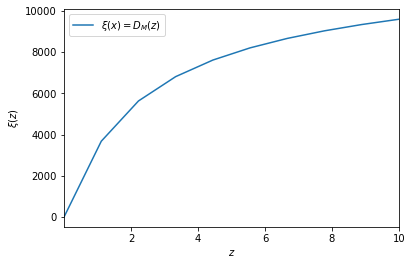

In [40]:
plt.xlim(z_min,z_max)
# plt.yscale('log')

plt.xlabel(r'$z$')
plt.ylabel(r'$\xi(z)$')

plt.plot(zlist, theory.transverse_distance(cParIni,zlist), label = r'$\xi(x) = D_M(z)$')

plt.gca().legend()

In [5]:
theory.transverse_distance(cParIni,zlist)

array([4.27307206e+00, 3.56727608e+03, 5.48514650e+03, 6.65657529e+03,
       7.45774195e+03, 8.04816315e+03, 8.50601569e+03, 8.87429913e+03,
       9.17878548e+03, 9.43595655e+03])

In [42]:
# SOund horizon for the  current cosmology 
print('The sound horizon in MPc is : ' + str(round(theory.sound_horizon(cParIni), 2)))

The sound horizon in MPc is : 146.61


In [7]:
%timeit theory.sound_horizon(cParIni)

13.5 µs ± 432 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [67]:
lcdm = Cosmology('LCDM',['H0','Omega_m'])
wcdm = Cosmology('wCDM',['H0','Omega_m','w0'])

In [73]:
lcdm._transverse_distance_([70, 0.3], zlist)

array([   0.        , 3563.00252552, 5480.86846219, 6652.2955333 ,
       7453.46122345, 8043.88164985, 8501.73372259, 8870.0167495 ,
       9174.50291195, 9431.67380384])

In [87]:
wcdm._transverse_distance_( [70, 0.3, -1.3], zlist)

array([   0.        , 3756.12021805, 5743.63627523, 6933.36832763,
       7740.79000998, 8333.81846036, 8792.9217005 , 9161.87050455,
       9466.74024632, 9724.14483018])

In [78]:
wcdm._transverse_distance_( [70, 0.3, -1.3], zlist)

array([   0.        , 3756.12021805, 5743.63627523, 6933.36832763,
       7740.79000998, 8333.81846036, 8792.9217005 , 9161.87050455,
       9466.74024632, 9724.14483018])

In [34]:
klcdm = Cosmology('kLCDM',['H0','Omega_m','Omega_k'])

In [36]:
klcdm.transverse_distance( [70, 0.3, 0.1], zlist)

array([4.28157123e+00, 3.49909018e+03, 5.42973331e+03, 6.66479343e+03,
       7.54168971e+03, 8.20704907e+03, 8.73514182e+03, 9.16806810e+03,
       9.53172140e+03, 9.84303874e+03])